## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

---
Using Google CoLab, hence ignoring installation of libraries except 'pgeocode'. This one needs installation in CoLab.


---




In [ ]:
! pip install pgeocode

In [ ]:

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")
import pgeocode

## Loading the dataset

In [ ]:
# Mounting google drive and initilizing path variable
from google.colab import drive
drive.mount("/content/drive")
path = '/content/drive/MyDrive/PGPAIML/Project-2/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading data from Loan_Modelling.csv
loan = pd.read_csv(path+'Loan_Modelling.csv')
data = loan.copy()

## Data Overview

In [ ]:
# Displaying first 5 records of the data
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Displaying last 5 records of the data
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.shape

(5000, 14)

**Observations**
* The dataset consists of 5,000 rows and 14 columns.
* The ID column contains unique identifiers that do not provide relevant information.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observations**
* The dataset consists of 5,000 rows and 14 columns, all of which are numerical (one float64 and thirteen int64 columns).
* The ID column is likely not significant for identifying customers with the highest likelihood of accepting a loan.
* Family size ranges from 1 to 4 members.
* The experience column contains some anomalies, with a minimum of -3 years and a maximum of 43 years.
* The median income is \$64,000.
* The highest mortgage amount is \$635,000, while the median mortgage value is \$0.00.
* Over 50% of customers use online banking.


In [ ]:
# Checking for null values in data.
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
# Checking duplicate values in data.
data.duplicated().sum()

0

**Observations**
* No null values found in the dataset.
* Also, no duplicate column exists.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

***Please check observations provided below for answers of above questions***


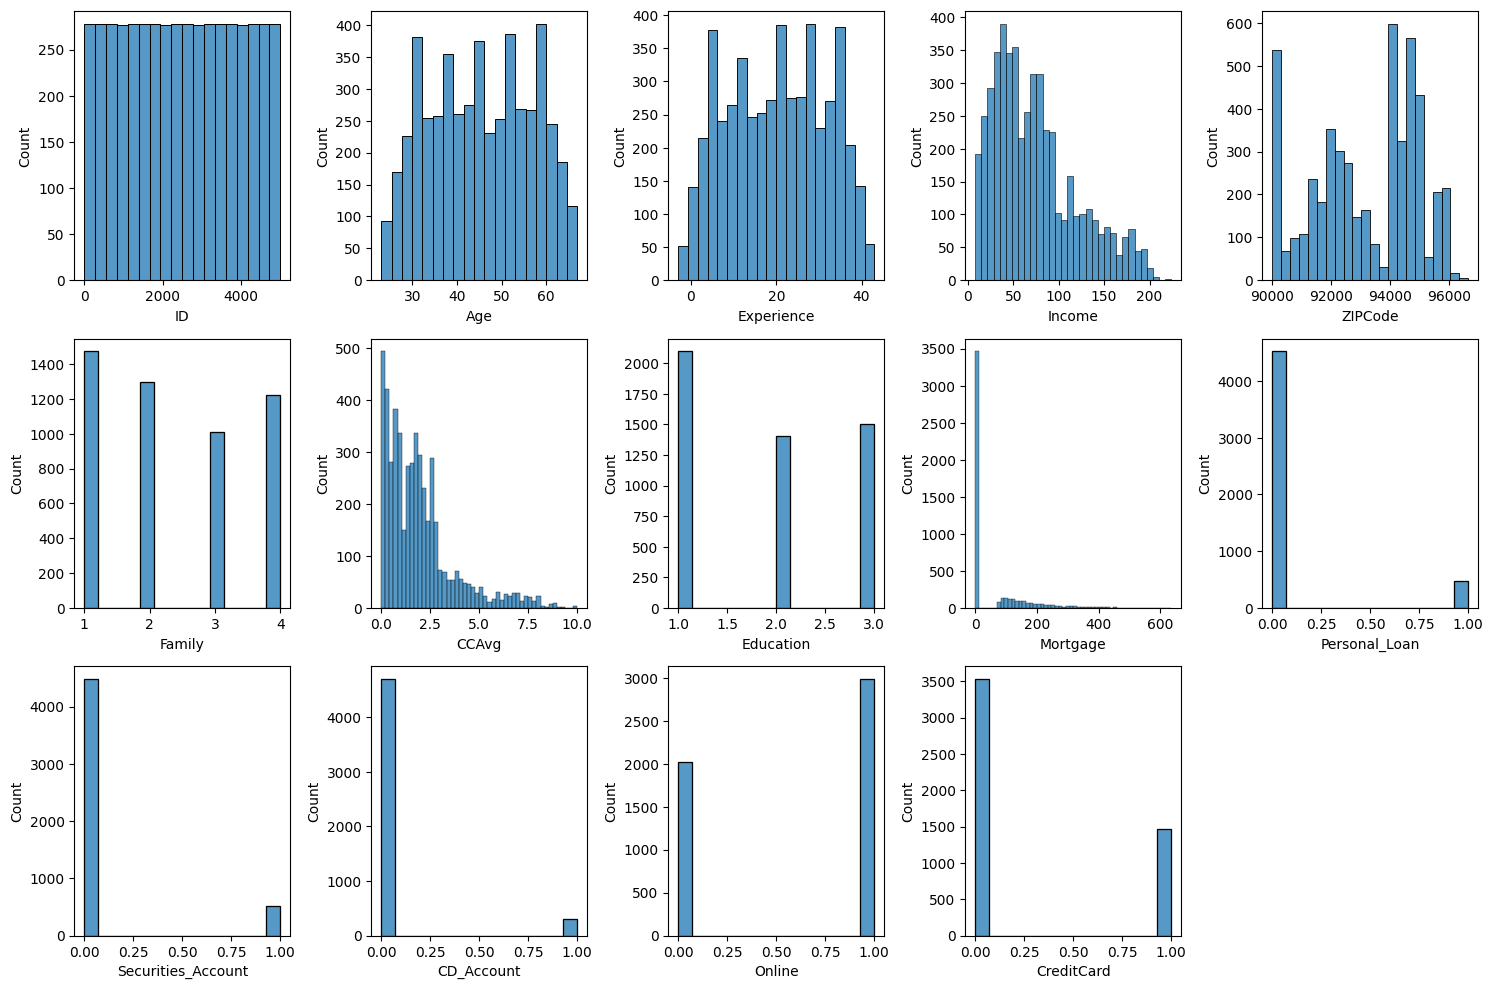

In [ ]:
# Generating Histogram Plot for all the columns
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

# plotting the histogram for each numerical feature
for i, feature in enumerate(numerical_columns):
    plt.subplot(3, 5, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();   # to add spacing between plots

**Observations**
* The ID column serves as a unique key for each customer but does not contain relevant information.
* The age and experience columns are interrelated.
* Family size ranges from 1 to 4, with the majority being 1.
* Most customers have a CCAvg (credit card average spending) between \$0 and \$3K.
* The majority of customers have High School education.
* The mortgage distribution is highly right-skewed.
* The proportion of customers who have taken personal loans is relatively low.
* Most customers do not have a security account.
* The majority do not hold a CD account.
* Online banking usage is prevalent among most customers.
* Nearly half of the account holders have a credit card.


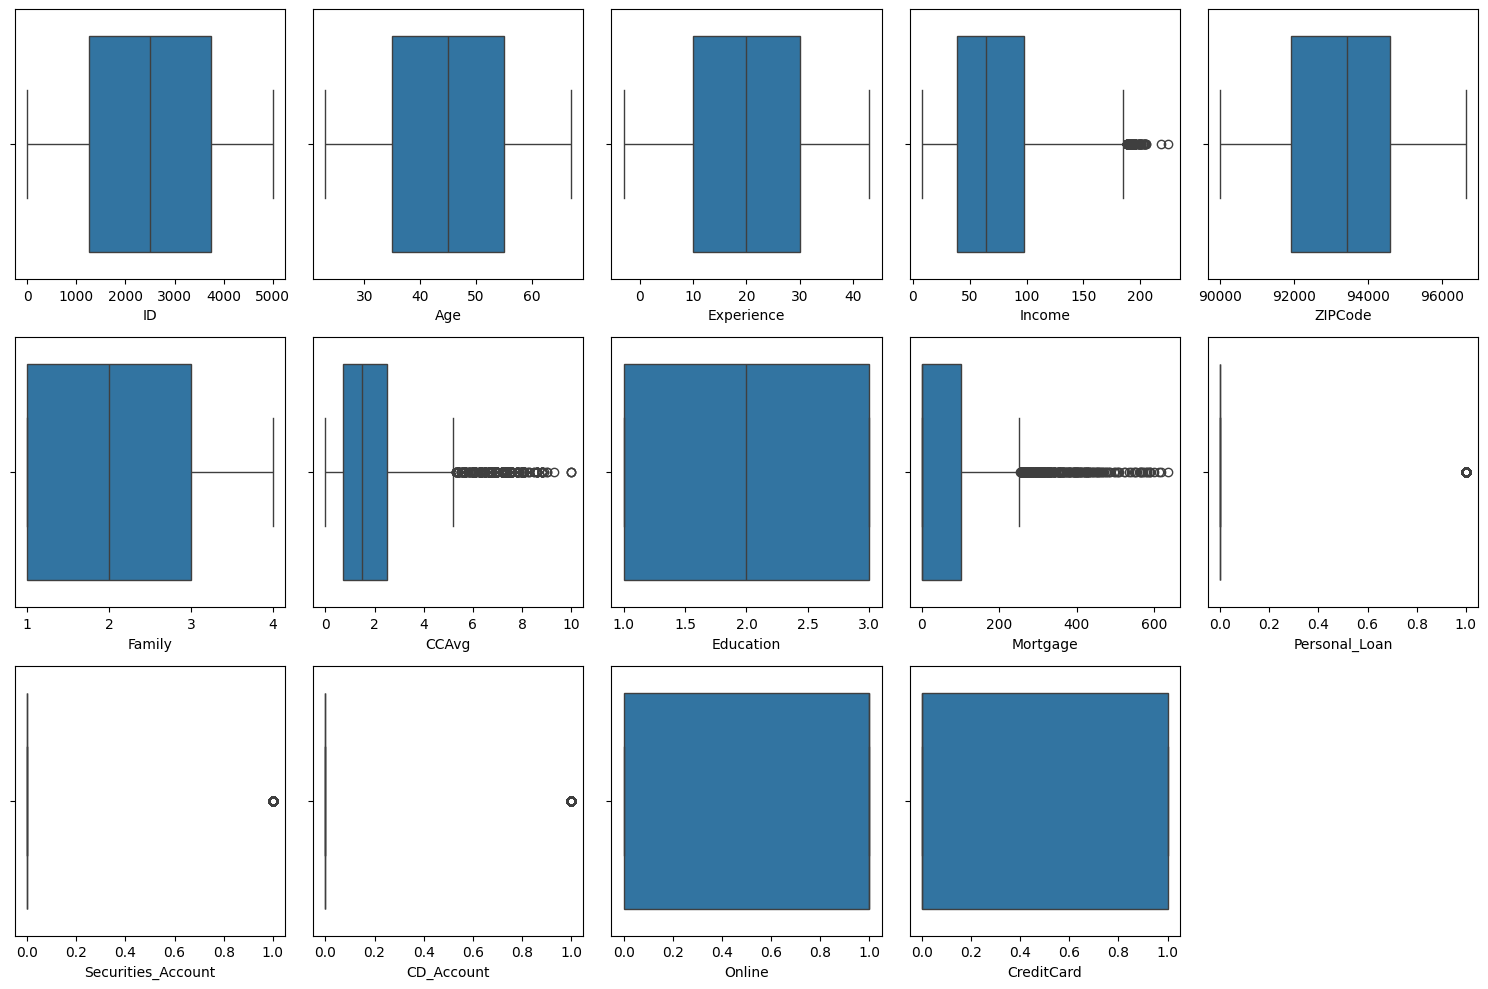

In [ ]:
# Generating boxplot for all the columns
# defining the figure size
plt.figure(figsize=(15, 10))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(numerical_columns):
    plt.subplot(3, 5, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout();    # to add spacing between plots

**Observations**
* The age and experience data are fairly distributed.
* All ZIP codes range from 9xxxx to 96xxx, suggesting that all customers may be from the same state.
* The median family size is 2.
* Income, CC average, and mortgage exhibit highly right-skewed distributions with outliers.


Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 



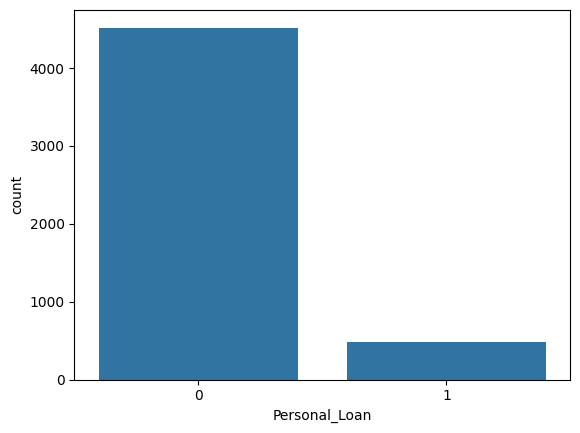

In [ ]:
# Generating count plot for customers with or without personal loan(s)
# checking the distribution of the categories in personal loan
print(100*data['Personal_Loan'].value_counts(normalize=True), '\n')

# plotting the count plot for personal loan
sns.countplot(data=data, x='Personal_Loan');

**Observations**
* The proportion of customers who have taken personal loans is relatively low at 9.6%.

CreditCard
0    3530
1    1470
Name: count, dtype: int64 



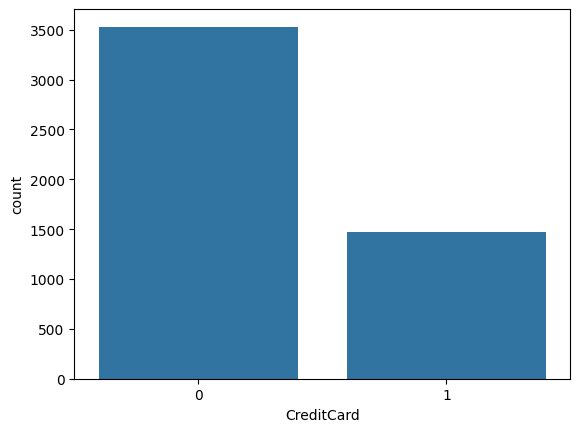

In [ ]:
# Generating count plot for customers with or without credit card(s)
# checking the distribution of the categories in credit card
print(data['CreditCard'].value_counts(), '\n')

# plotting the count plot for credit card
sns.countplot(data=data, x='CreditCard')
plt.show()

**Observations**
* Out of 5000, customers only 1470 have a credit card, which is nearly 30%

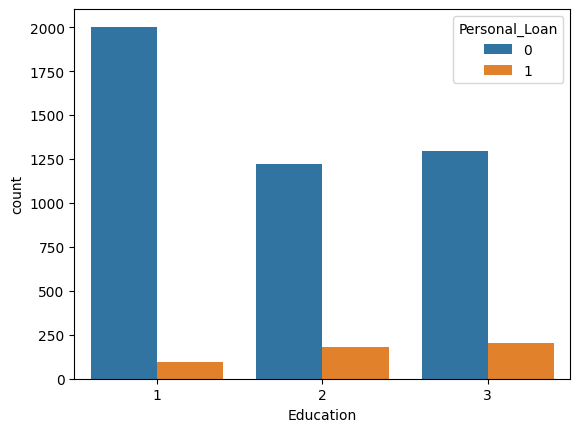

In [ ]:
# Plotting education level of customers with and without a personal loan
sns.countplot(data=data, x='Education', hue='Personal_Loan')
plt.show()

**Observations**
* This plot shows that customers with higher education are more inclined to accept a personal loan.

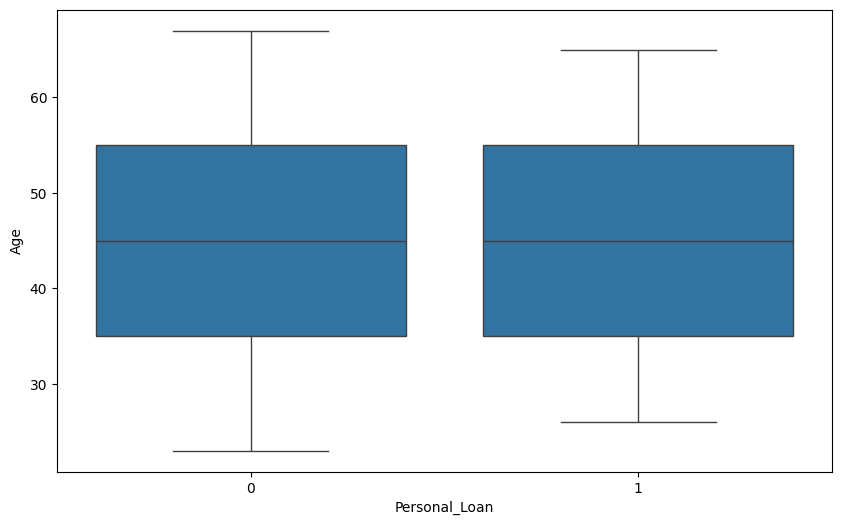

In [ ]:
# Plotting distribution of customenr's age with and without a personal loan
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Personal_Loan', y='Age');

**Observations**
* This plot shows that the customer's age does not affect their interest in getting a personal loan.
* Fairly all age groups of customers are interested in a personal loan unless they are too young or too old.

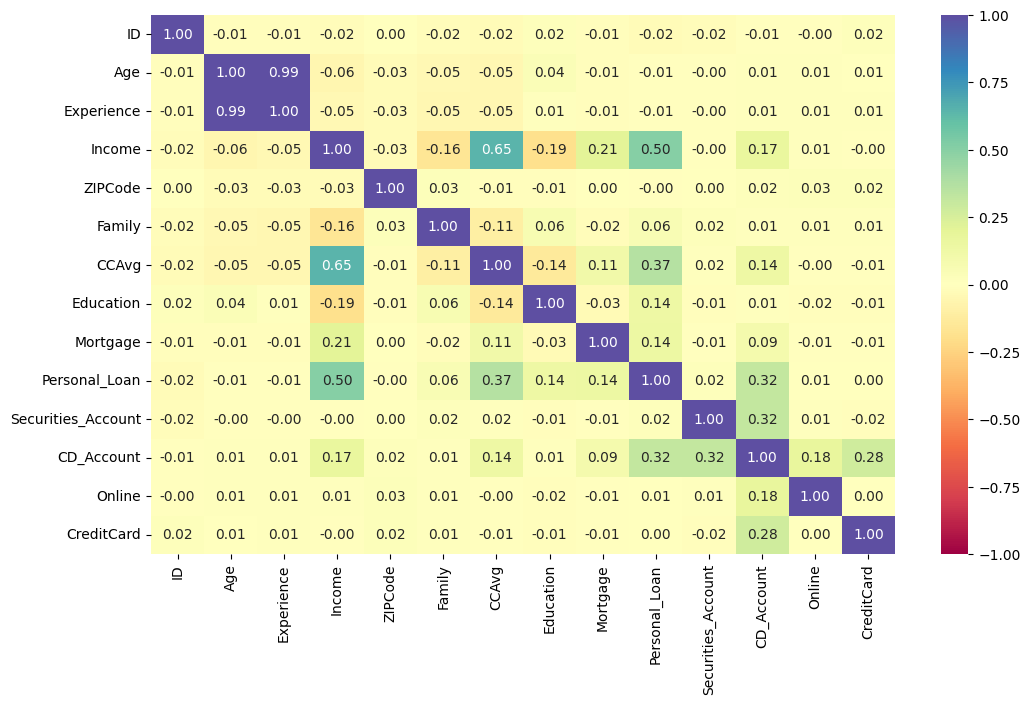

In [ ]:
# Generating heatmap for all numerical veriables
# defining the size of the plot
plt.figure(figsize=(12, 7))

# plotting the heatmap for correlation
sns.heatmap(
    data.corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

**Observations**
* Age and experience are highly correlated, which is expected.
* Income shows a strong correlation with credit card spending.
* There is also a strong correlation between income and the likelihood of taking a personal loan.
* This suggests that average credit card spending is related to interest in personal loans.
* Family size and education have a slight negative correlation with income.

<Figure size 1200x800 with 0 Axes>

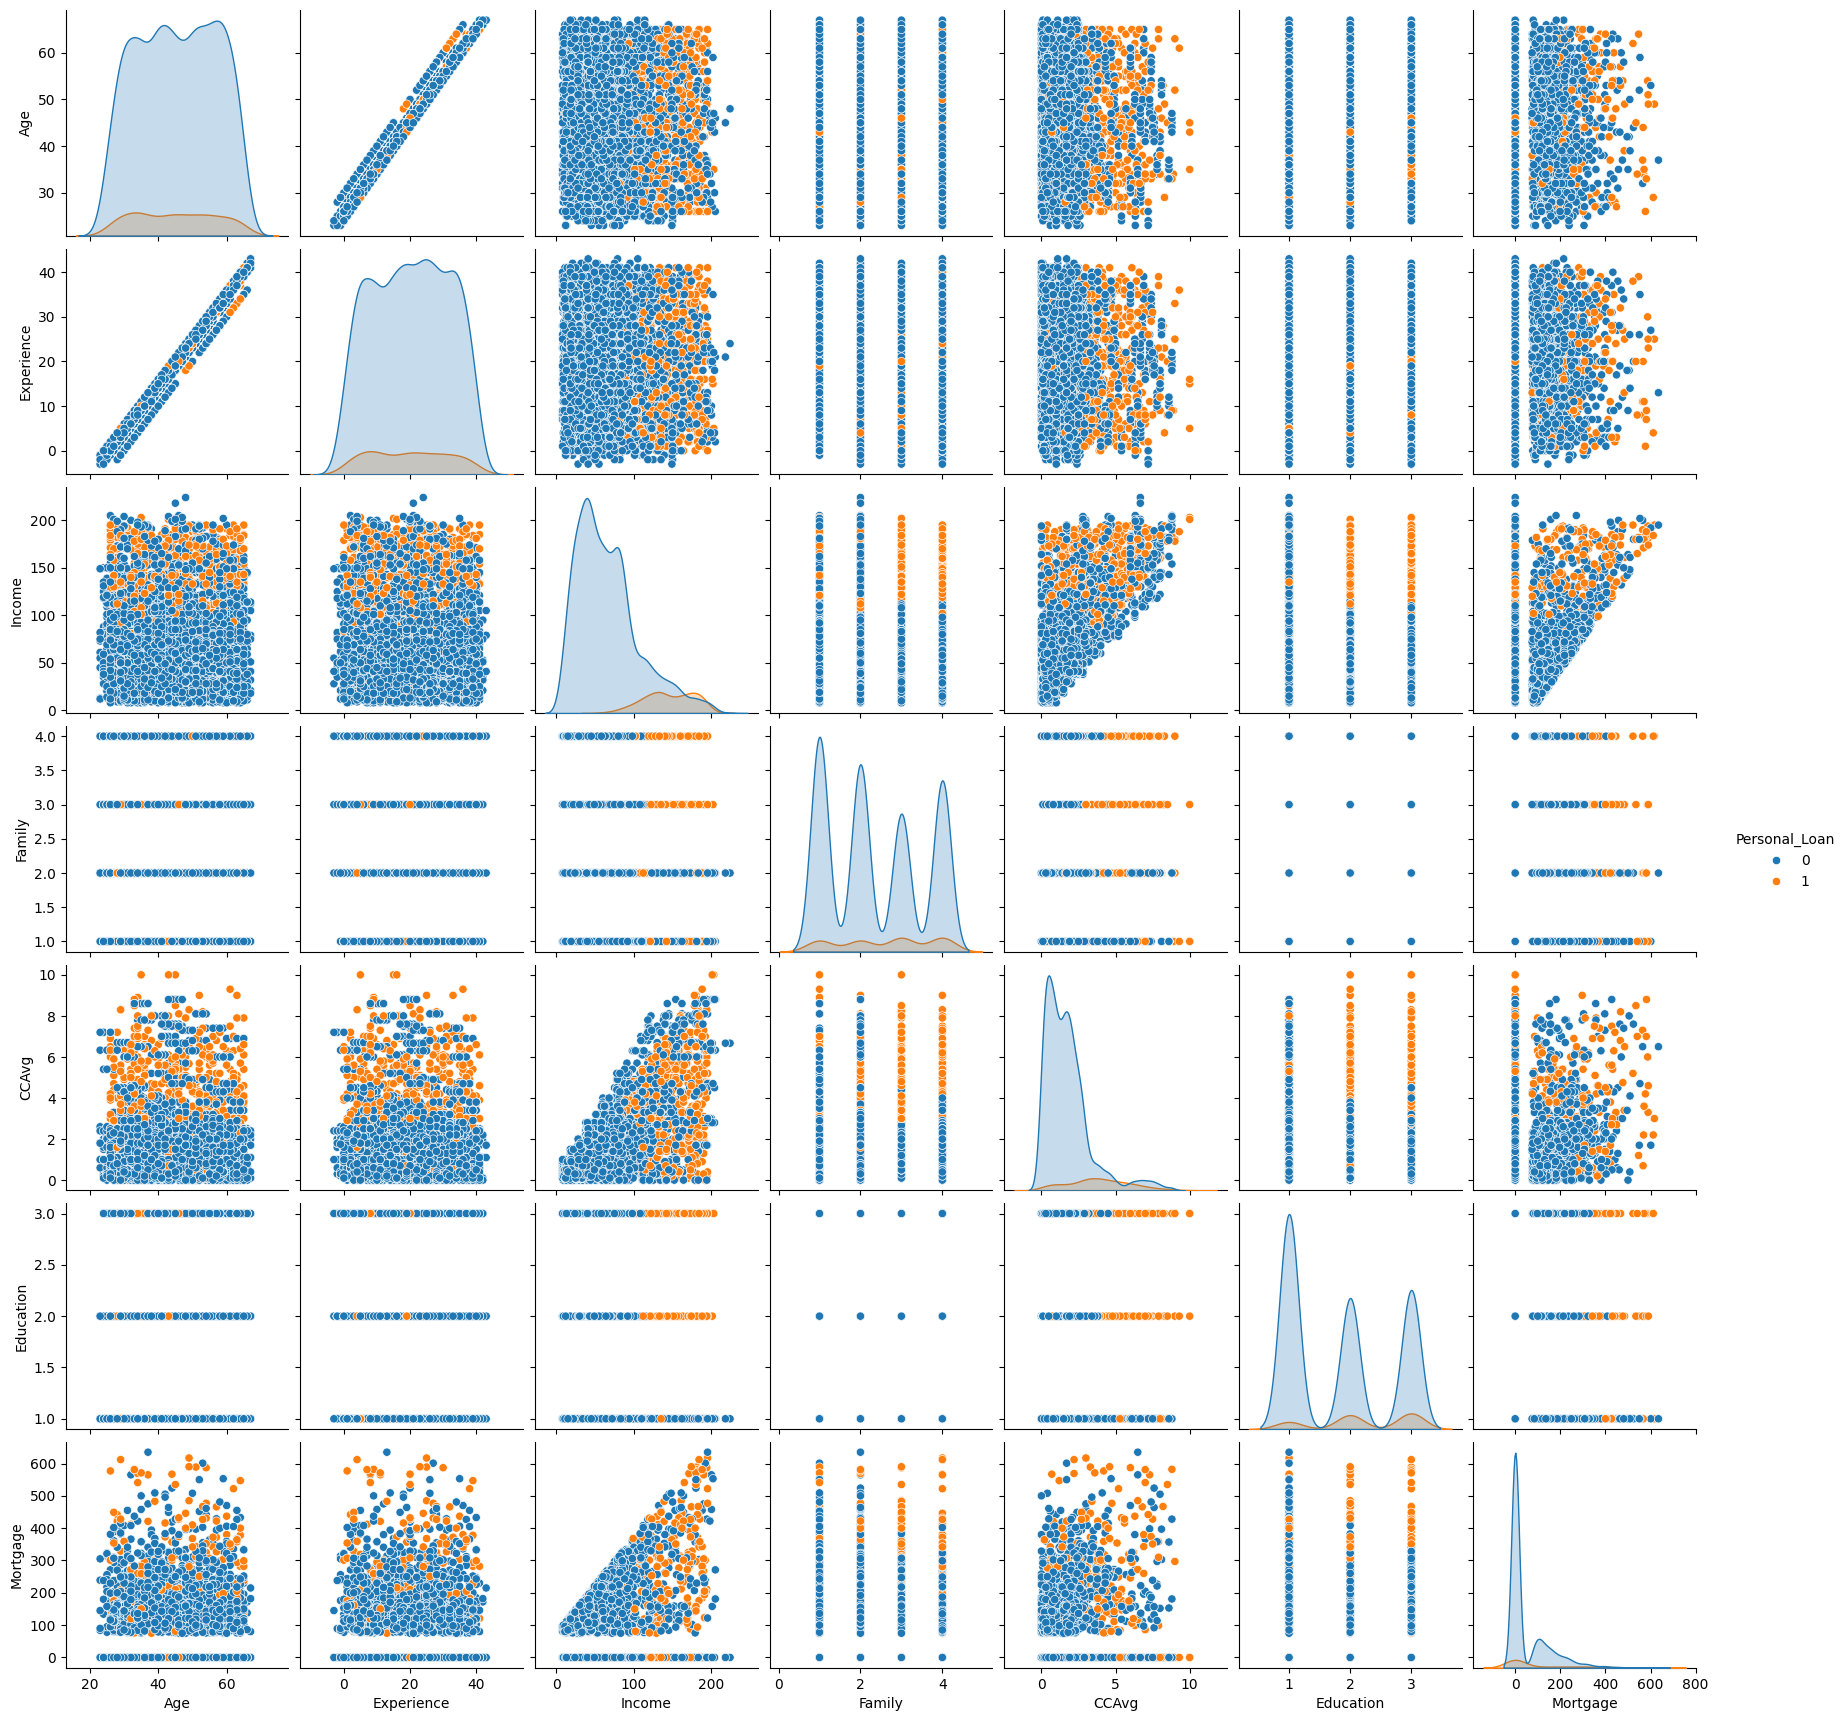

In [ ]:
# Generating scatter plot matrix for non binary continius veriables
# Scatter plot matrix with hue Personal_loan
non_cat_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']
plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=non_cat_features , hue='Personal_Loan', diag_kind='kde');

**Observations**
* Higher income groups are more inclined to take a personal loan.
* Higher education is also associated with increased interest in personal loans, though this trend is not universal.
* Customers with very low mortgages show more interest in loans, as do those with high incomes and high mortgages.
* Interest in personal loans is relatively consistent across all ages and experience levels.
* Families with 3 or 4 members appear more inclined to take a personal loan.
* Higher credit card spending is slightly associated with a greater interest in personal loans.


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

***Please check observations provided below for answers of above questions***




**Observations**
* The dataset contains no null or duplicate values.
* However, it is important to analyze categorical data, such as ZIP codes.
* Additionally, there are negative values in the experience column, which require further investigation.

In [ ]:
# First, dropping the ID column as this key column has no relevance in the analysis we are going to perform
data.drop('ID', axis=1, inplace=True)

In [ ]:
# How many negative values exist in Experience column
data[data['Experience'] < 0]['Experience'].count()

52

In [ ]:
# Treating negative values in experience column by taking the absolute value as we can considar it as data generation error.
data['Experience'] = data['Experience'].abs()
data[data['Experience'] < 0]['Experience'].count()

0

In [ ]:
# Checking how many unique ZIPCodes exists in our data set.
data['ZIPCode'].nunique()

467

In [ ]:
# Seperating out ZIP code data in a new DataFrame
data['ZIPCode'].nunique()
zip_codes = data['ZIPCode'].unique().astype(str)

# Considaring the range of the ZIP code the country of the customers are USA.
country_code = 'US'

# This is the function to get city and state from the ZIP code using p-geocode library
def convert_zip_codes(zip_codes, country_code):
    """Converts a list of zip codes to palce name and state name using pgeocode."""

    nomi = pgeocode.Nominatim(country_code)
    result = nomi.query_postal_code(zip_codes)

    return result[['postal_code', 'place_name', 'state_name']]

# Get city_state as a seperate data frame
city_sate = convert_zip_codes(zip_codes, 'US')
# Convert data type of postal_code column to int64 to match out data set data type, which is int64
city_sate['postal_code'] = city_sate['postal_code'].astype(np.int64)
# Create a new merged dataset, making an outer join using ZIP codes
merged_data = pd.merge(data, city_sate, left_on='ZIPCode', right_on='postal_code')

In [ ]:
# Checking if all ZIP codes are converted to City + State or there are some invalid ZIP Codes
invalid_zip_codes = merged_data[merged_data['place_name'].isnull()][['ZIPCode', 'place_name']]
invalid_zip_codes['ZIPCode'].unique()

array([92717, 93077, 92634, 96651, 92709])

**Observations**

Five ZIP codes were not recognized by the p-geocode library. Using the lookup facility on ValidZip, I was able to identify three of the five unrecognized ZIP codes, as listed below:

* 92717 → Irvine, CA
* 93077 → Unknown
* 92634 → Fullerton, CA
* 96651 → Unknown
* 92709 → Irvine, CA

The two remaining ZIP codes appear to be either mistyped or outdated. Given the small number of affected records (2 out of 5,000), I opted to label them as 'Unknown' to enable consistent one-hot encoding across all columns.

In [ ]:
# Update merged dataset place_name by manually identified names.
merged_data.loc[merged_data['ZIPCode'] == 92717, 'place_name'] = 'Irvine'
merged_data.loc[merged_data['ZIPCode'] == 93077, 'place_name'] = 'Unknown'
merged_data.loc[merged_data['ZIPCode'] == 92634, 'place_name'] = 'Fullerton'
merged_data.loc[merged_data['ZIPCode'] == 96651, 'place_name'] = 'Unknown'
merged_data.loc[merged_data['ZIPCode'] == 92709, 'place_name'] = 'Irvine'

In [ ]:
# Checking if all ZIP codes are treated or not.
invalid_zip_codes = merged_data[merged_data['place_name'].isnull()][['ZIPCode', 'place_name']]
invalid_zip_codes['ZIPCode'].nunique()

0

In [ ]:
# Dropping ZIP Code and postal_code column as we converted them to City and State
merged_data.drop('ZIPCode', axis=1, inplace=True)
merged_data.drop('postal_code', axis=1, inplace=True)
# Printing state and city counts
print("Unique State:", merged_data['state_name'].nunique())
print("Unique Places", merged_data['place_name'].nunique())

Unique State: 1
Unique Places 245


In [ ]:
# Dropping State Column as there is only one state and lost it's significance in classification
merged_data.drop('state_name', axis=1, inplace=True)
data = merged_data
print(merged_data.shape)

(5000, 13)


**Observations**
* Removed the unnecessary ID column.
* Addressed negative values in the experience column.
* Converted ZIP codes into a categorical variable labeled 'City'.
* Handled missing or invalid ZIP codes.


In [ ]:
# Defining the explanatory (independent) and response (dependent) variables also doing one-hot encoding for place_names.
X = data.drop(["Personal_Loan"], axis=1)
y = data["Personal_Loan"]
#doing one-hot encoding for categorical variable place_name.
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
X = X.astype(float)
print(X.shape)
X.head()

(5000, 255)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,...,place_name_Vista,place_name_Walnut Creek,place_name_Weed,place_name_West Covina,place_name_West Sacramento,place_name_Westlake Village,place_name_Whittier,place_name_Woodland Hills,place_name_Yorba Linda,place_name_Yucaipa
0,25.0,1.0,49.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45.0,19.0,34.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39.0,15.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35.0,9.0,100.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35.0,8.0,45.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

,Personal_Loan
0,0
1,0
2,0
3,0
4,0


In [ ]:
# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)    # stratify ensures that the training and test sets have a similar distribution of the response variable

In [ ]:
# Making sure that the split data sustains a balance distribution on Personal_loan YES and NO count.
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape, '\n')
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True))

Shape of training set: (4000, 255)
Shape of test set: (1000, 255) 

Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

* The goal of this model is to identify customers who are likely to take a personal loan, either now or in the future.
* This requires minimizing false negatives as much as possible.
* Maximizing the **recall score** is critical for the business, as it ensures that every potential opportunity to acquire a valuable customer is captured. Therefore, recall will be the primary metric when evaluating the model on **test (unseen)** data.
* While the focus is on recall, the model will also needs to be assessed for overall balance across other metrics, including accuracy, precision, and F1 score.

### Model Building
* Begin by building a default decision tree model as a baseline before gradually improving its performance.
* Given the dataset's class imbalance ***(9.6% positive vs. 90.4% negative)***, we will use ***class_weight='balanced'*** to address this bias by assigning more weight to the minority class.
* Additionally, ***random_state=1*** will be set for consistency and reproducibility.

In [ ]:
# Initially - creating an instance of the decision tree model with default hyper parameters
dtree1 = DecisionTreeClassifier(random_state=1, class_weight='balanced')    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [ ]:
# Writing a function to return a DataFrame by computing accurecy, recall, precision and F1 scores
def get_model_performance(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Writing a function to plot the confusion matrix of the model.
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

In [ ]:
# The below function displays a horizontal bar chart of the most important features
def display_importance_of_features(decision_tree, feature_names):
  # importance of features in the tree building
  importances = decision_tree.feature_importances_
  df_imp = pd.DataFrame(importances, index=feature_names)
  df_imp = df_imp[df_imp[0] != 0]
  df_imp.columns = ['IMP']
  dp_imp = df_imp.sort_values(by='IMP', ignore_index=False, inplace=True)
  index_values = df_imp.index.values
  plt.figure(figsize=(10, 10))
  plt.title("Feature Importances")
  plt.barh(range(df_imp.shape[0]), df_imp['IMP'], color="red", align="center")
  plt.yticks(range(df_imp.shape[0]), index_values)
  plt.xlabel("Relative Importance")
  plt.show()

In [ ]:
# Displaying the default model's performance on train data
dtree1_train_performance = get_model_performance(dtree1, X_train, y_train)
dtree1_train_performance

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


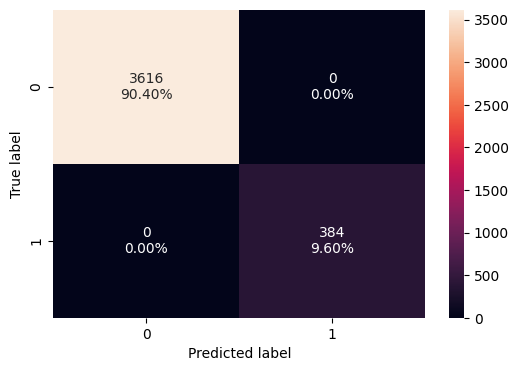

In [ ]:
# Displaying the confusion matrix of the default model using train data
plot_confusion_matrix(dtree1, X_train, y_train)

In [ ]:
# Displaying the default model's performance on test data
dtree1_test_performance = get_model_performance(dtree1, X_test, y_test)
dtree1_test_performance

,Accuracy,Recall,Precision,F1
0,0.972,0.916667,0.814815,0.862745


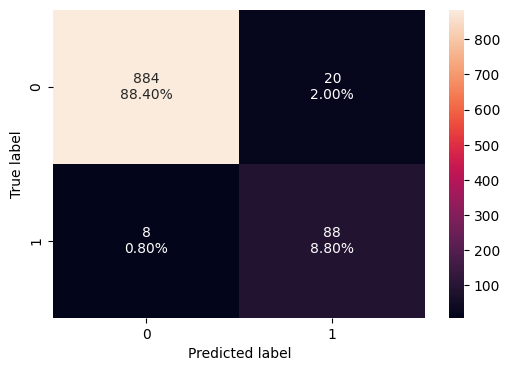

In [ ]:
# Displaying the confusion matrix of the default model using test data
plot_confusion_matrix(dtree1, X_test, y_test)

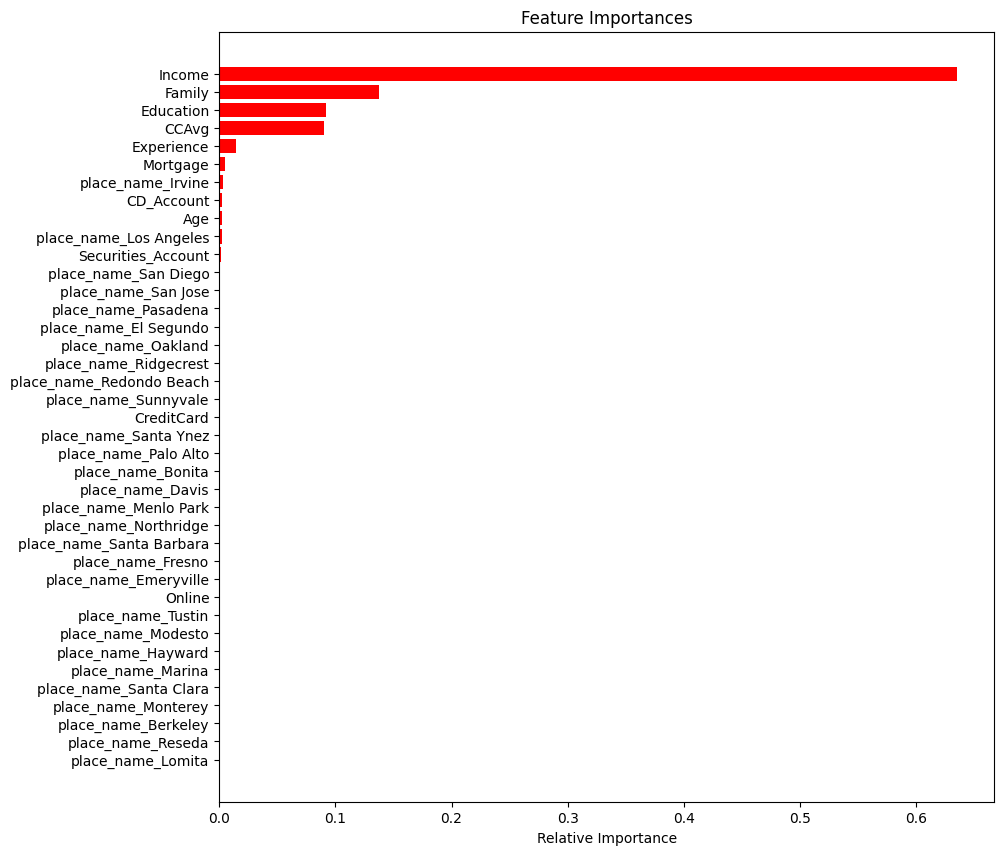

In [ ]:
# Displaying the most important features, identified in default model
display_importance_of_features(dtree1, X.columns)

In [ ]:
# Below function to display the decision tree.
def display_decision_tree (dtree, X_coll):

  # set the figure size for the plot
  plt.figure(figsize=(20, 20))

  # plotting the decision tree
  out = tree.plot_tree(
      dtree,                         # decision tree classifier model
      feature_names=X_coll,    # list of feature names (columns) in the dataset
      filled=True,                    # fill the nodes with colors based on class
      fontsize=9,                     # font size for the node text
      node_ids=False,                 # do not show the ID of each node
      class_names=None,               # whether or not to display class names
  )

  # add arrows to the decision tree splits if they are missing
  for o in out:
      arrow = o.arrow_patch
      if arrow is not None:
          arrow.set_edgecolor("black")    # set arrow color to black
          arrow.set_linewidth(1)          # set arrow linewidth to 1

  # displaying the plot
  plt.show()

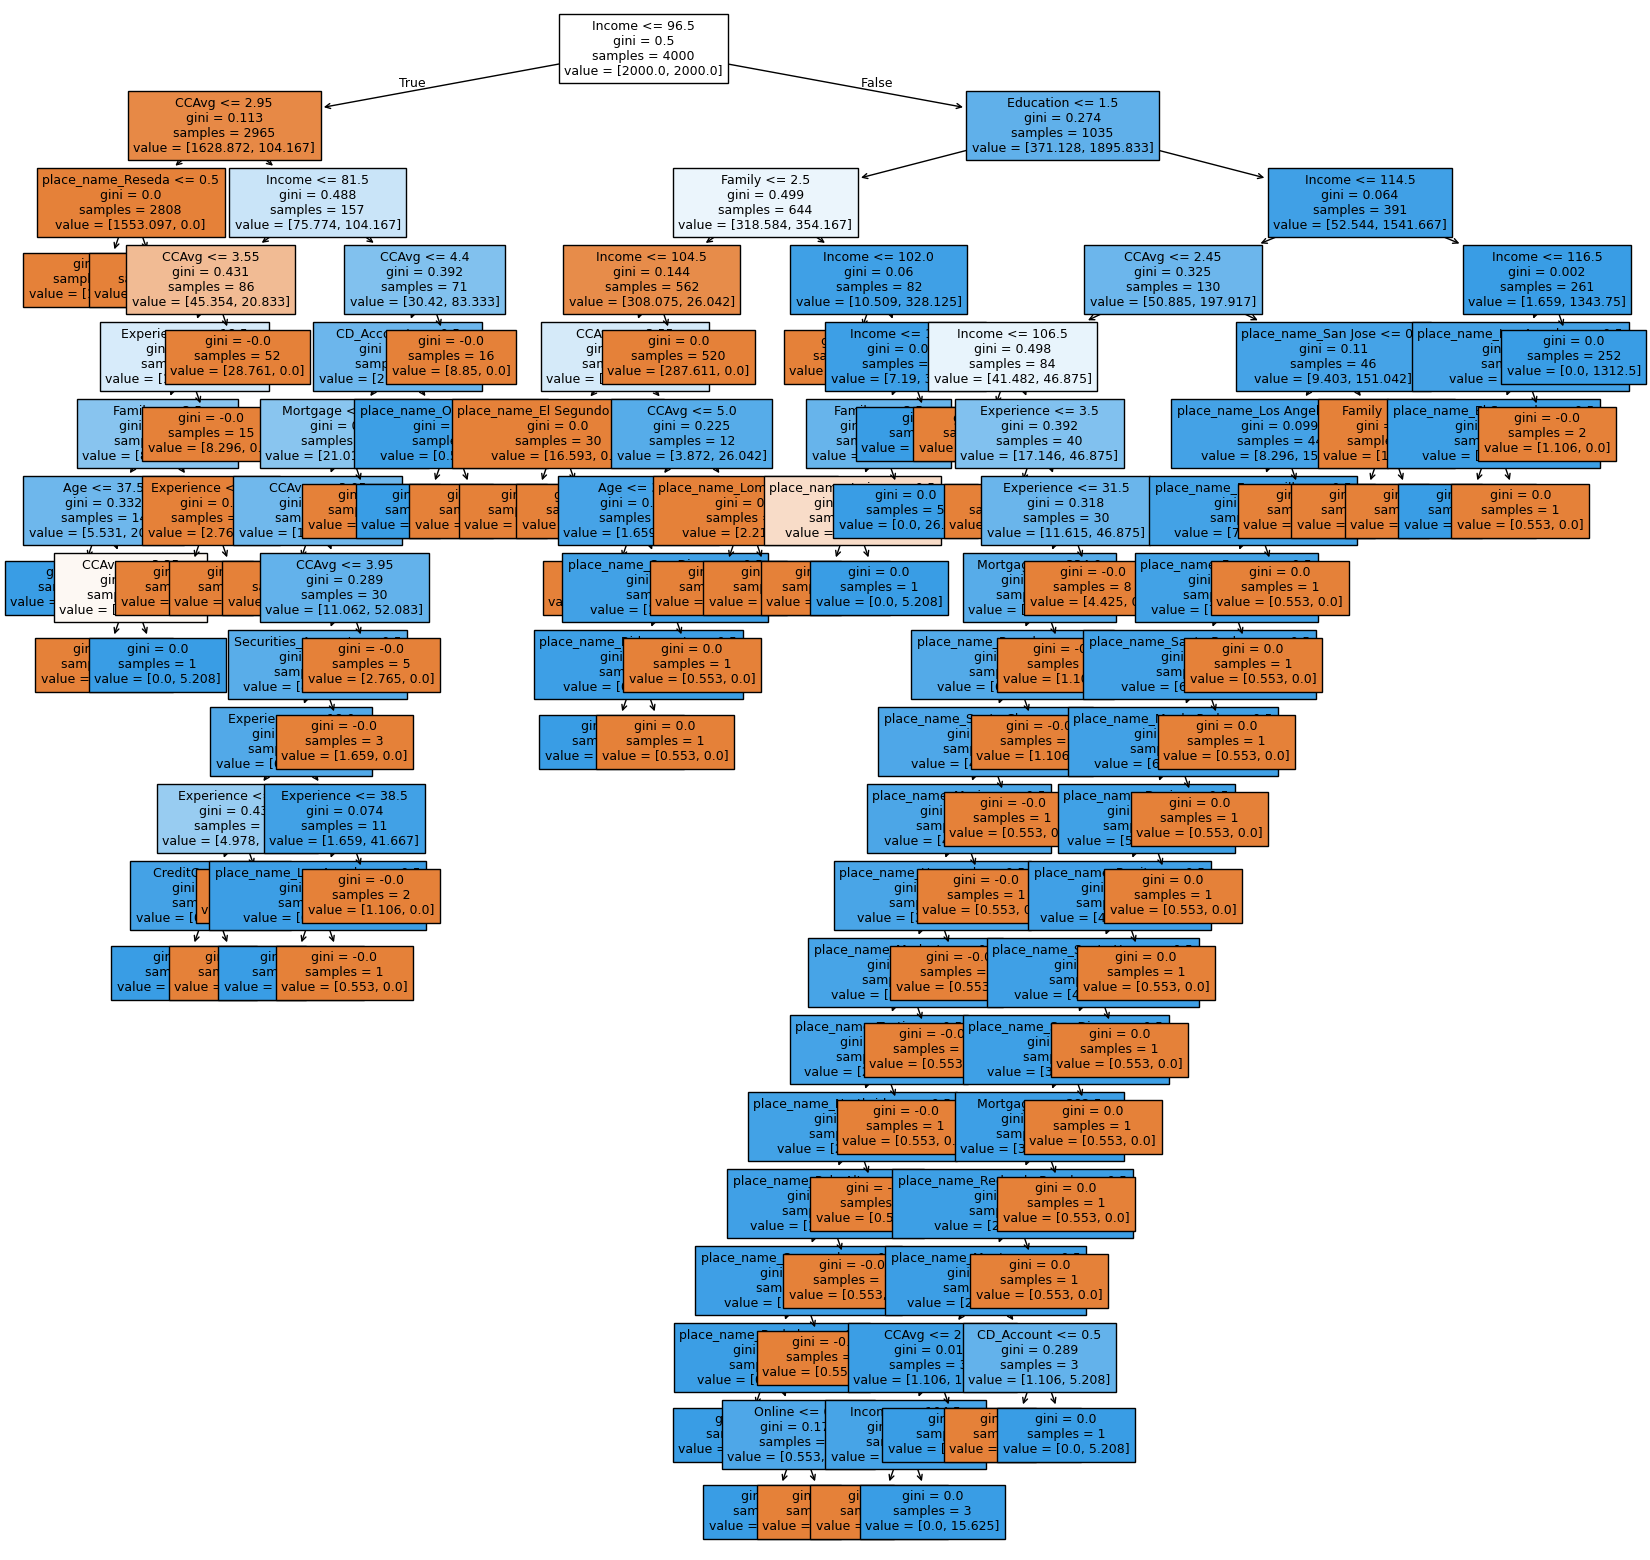

In [ ]:
display_decision_tree(dtree1, X.columns)

**Observations**
* The model has a perfect recall on the training set but a drop on the test set (0.083 difference). This indicates overfitting.

* However, the precision (0.814815 on test) is much lower than on the training set (1.0), which shows the model is predicting many false positives (lowering precision).

* F1 score: The F1 score is also impacted, dropping to 0.862745, which shows that the balance between precision and recall is not perfect.

* The above main feature chart and the decision tree show that the model is overly complex. Another sign of overfitting.
* The Tree has 17 levels and 49 features to classify all train data correctly but fails short in test data.

* It can be guessed that the model memorizes the learning from train data, a classic sign of overfitting.


***Conclusion:*** Overfitting is present, and while recall is good, the large precision gap means there may be many false positives, which could be problematic.



## Model Performance Improvement

We would like to use a decision tree pre-pruning technique using hyperparameters to improve the test data performance. As explained previously, the ***class_weight='balanced'***  to offset the bias in target data representation in the data set. Also use best recall score to identify the best model.
* max_depth_values
* max_leaf_nodes_values
* min_samples_split_values


In [ ]:

# Define the parameters of the tree to iterate over
# Will increase max-depth of the tree from 2 to 16 in steps of 2
max_depth_values = np.arange(2, 16, 2)
# By observing the default tree, we will increase max leaf nodes from 10 to 50 in steps by 10
max_leaf_nodes_values = np.arange(10, 51, 10)
# By observing the default tree, we will increase min samples to split from 10 to 50 in steps by 10
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=1,
                class_weight='balanced'
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # calculate F1 scores for training and test sets
            # train_f1_score = f1_score(y_train, y_train_pred)
            # test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test recall scores
            #score_diff = abs(train_f1_score - test_f1_score)
            score_diff = abs(train_recall_score - test_recall_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [ ]:
# Assigning the identified best
dtree2 = best_estimator

# Fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=10,
                       min_samples_split=10, random_state=1)

In [ ]:
# Check the scores of best pre prunined tree on train data
dtree2_train_performance = get_model_performance(dtree2, X_train, y_train)
dtree2_train_performance

,Accuracy,Recall,Precision,F1
0,0.798,1.0,0.322148,0.48731


In [ ]:
# Check the scores of best pre prunined tree on test data
dtree2_test_performance = get_model_performance(dtree2, X_test, y_test)
dtree2_test_performance

,Accuracy,Recall,Precision,F1
0,0.811,1.0,0.336842,0.503937


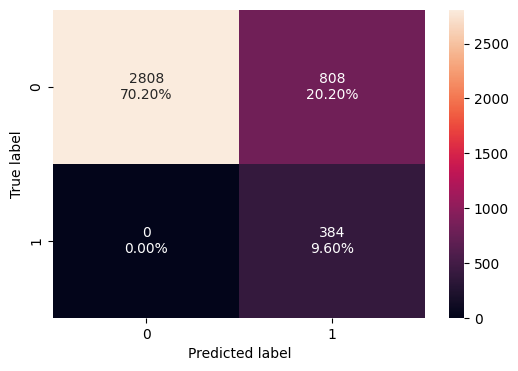

In [ ]:
# Display confusion matrix for train data
plot_confusion_matrix(dtree2, X_train, y_train)

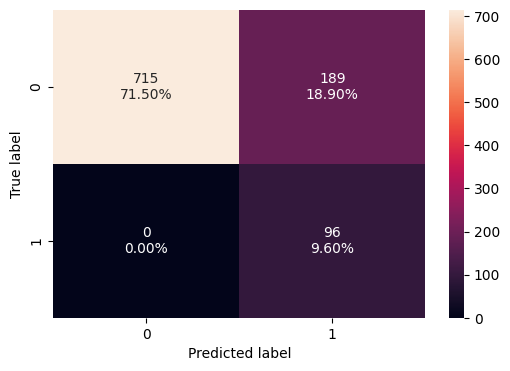

In [ ]:
# Display confusion matrix for test data
plot_confusion_matrix(dtree2, X_test, y_test)

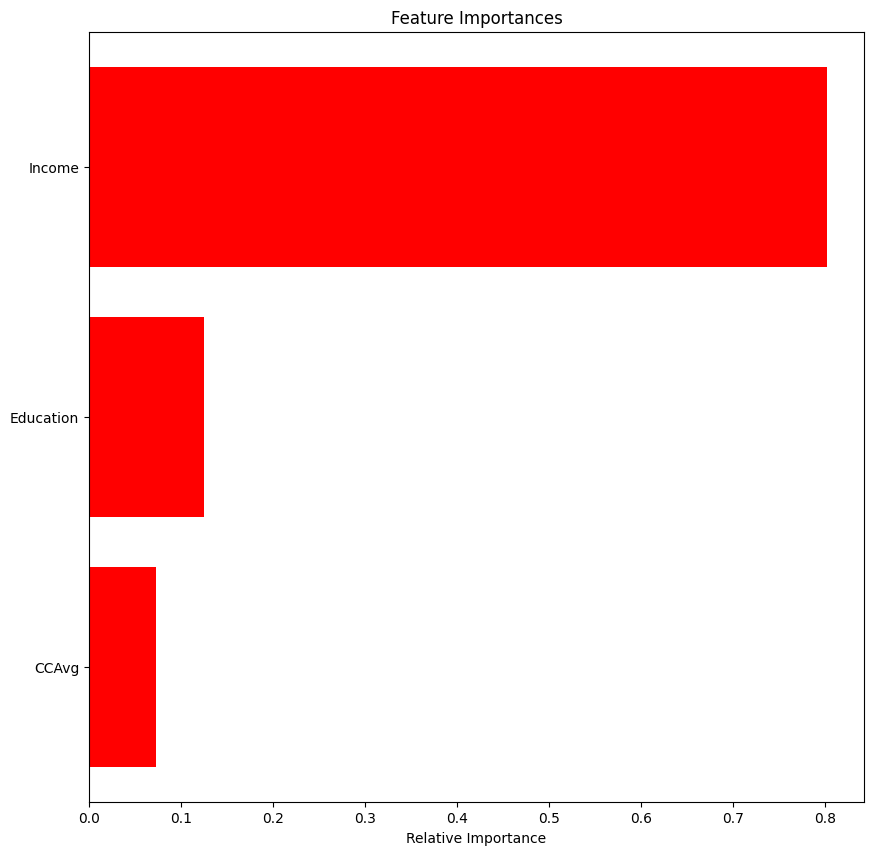

In [ ]:
display_importance_of_features(dtree2, X.columns)

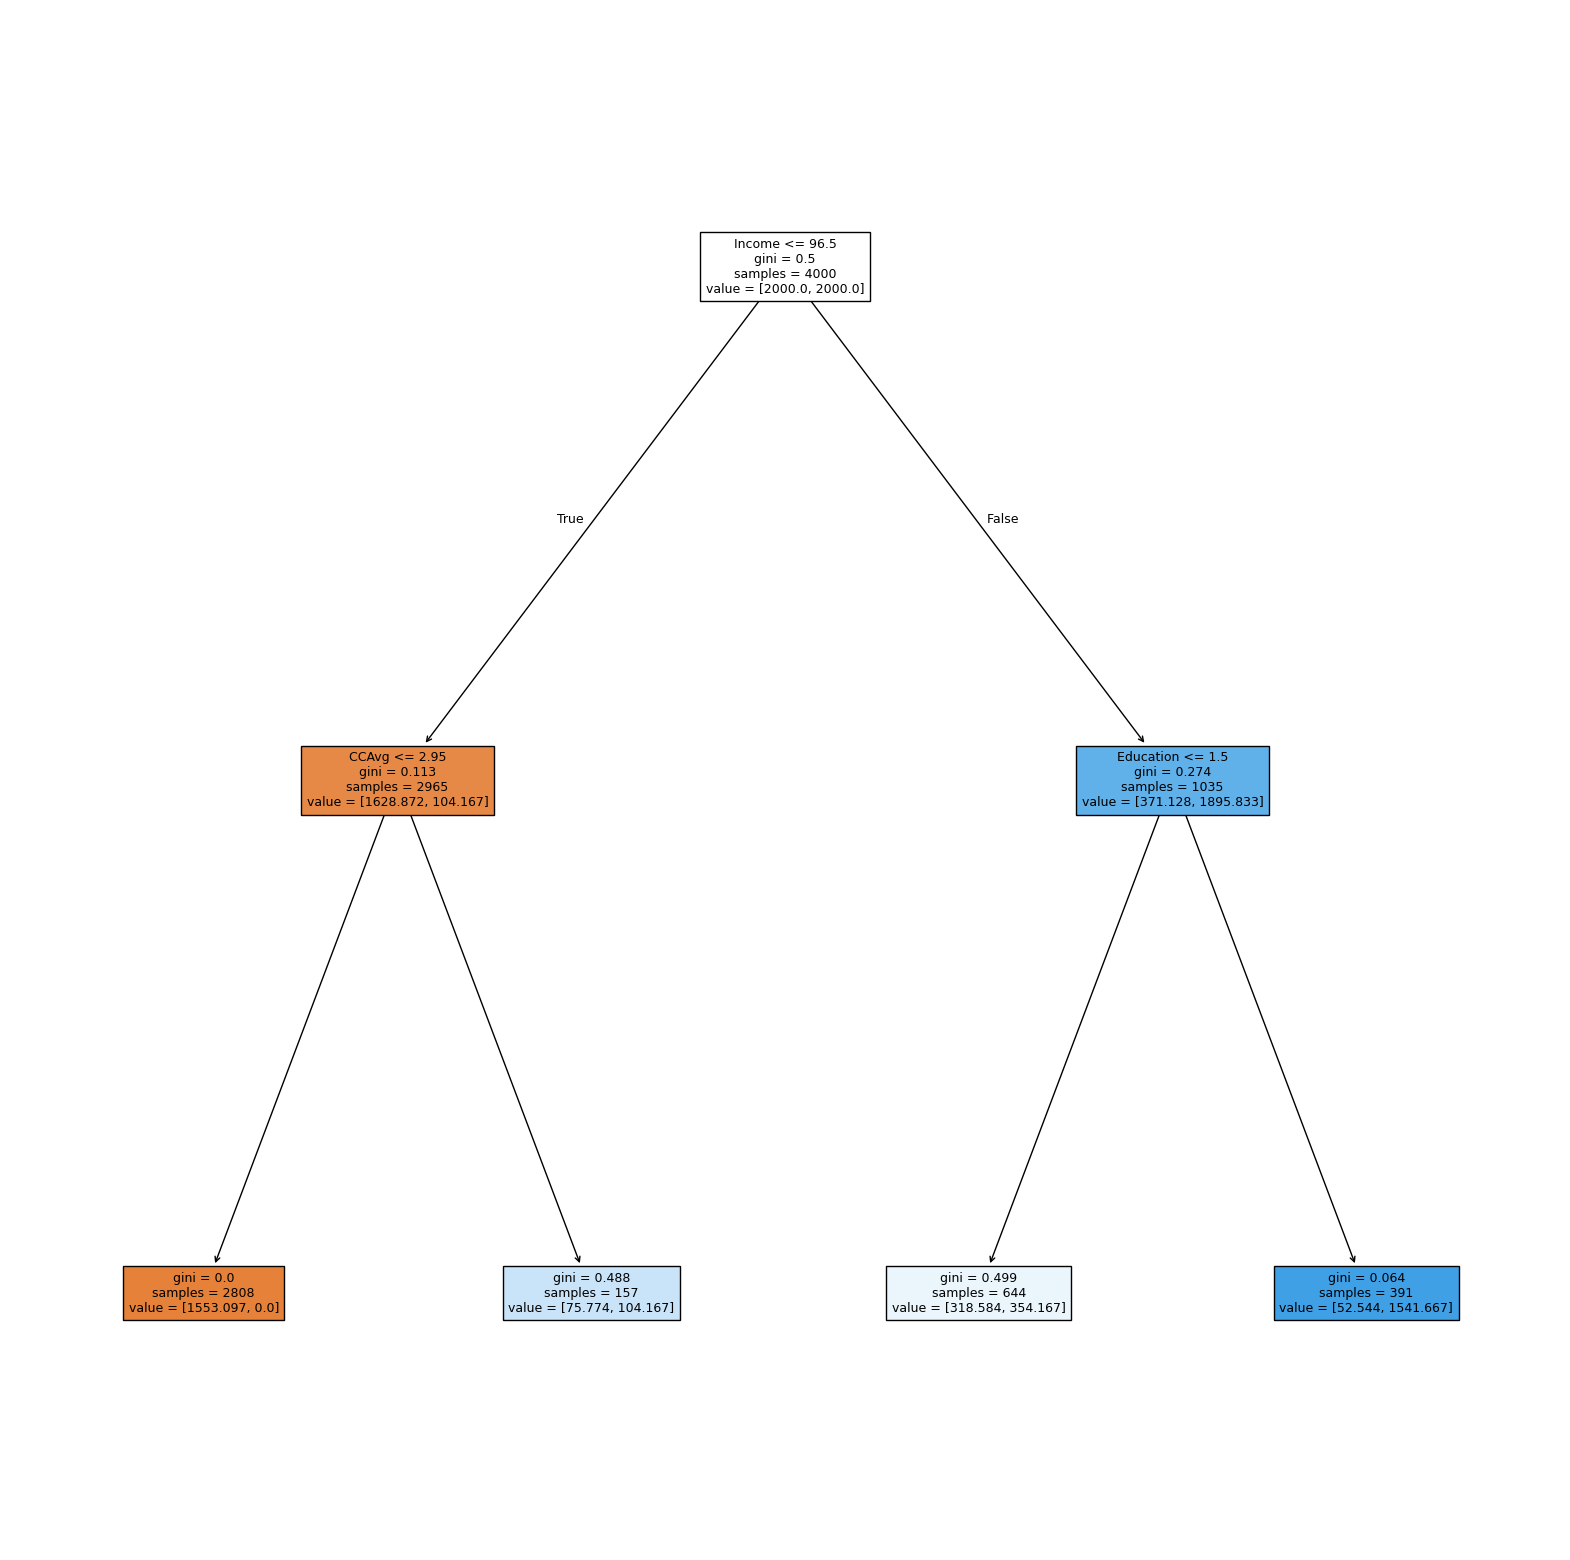

In [ ]:
display_decision_tree(dtree2, X.columns)

**Observations**
* The best-found pre-pruned decision tree based on recall score

```
DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=10,
 min_samples_split=10, random_state=1)
```
* This model has perfect recall on both the training and test sets, meaning that it’s identifying all the prospective customers without missing any (no false negatives).
* **Precision:** However, precision is quite low (0.336842 on test), meaning that while it's catching everyone, a significant number of false positives are being predicted.
* **F1 score:** The F1 score (0.503937 on test) reflects the low precision, showing a trade-off between precision and recall.
* **Conclusion:** While this model is great for recall, its low precision could be problematic, leading to a large number of customers being incorrectly identified as likely to take loans. It may work well if recall is the only focus, but the low precision could hurt its overall utility.

***To enhance model performance, we will apply a post-pruning technique next.***

* Generate a default decision tree using the training data to establish a baseline.
* Calculate ccp_alphas and impurities for each pruning path in the default tree.
* Create plots of alpha vs. impurity, alpha vs. number of nodes, and alpha vs. tree depth to visualize where complexity increases sharply.
* This will help identify the optimal level for pruning, balancing model simplicity and accuracy.
* The hyperparameters random_state=1 and class_weight='balanced' will remain constant to ensure reproducibility and address class imbalance.


In [ ]:
# Function to calculate ccp_alpha for default tree based on train data and plot impurity, depth and number of nodes.
def display_decision_tree_alpha_plots (X_train, y_train):
  # Create an instance of the decision tree model (default model)
  clf = DecisionTreeClassifier(random_state=1, class_weight='balanced')

  # Compute the cost complexity pruning path for the model using the training data
  path = clf.cost_complexity_pruning_path(X_train, y_train)

  # Extract the array of effective alphas from the pruning path
  ccp_alphas = abs(path.ccp_alphas)

  # Extract the array of total impurities at each alpha along the pruning path
  impurities = path.impurities
  print(pd.DataFrame(path))

  # Create a figure
  fig, ax = plt.subplots(figsize=(10, 5))

  # Plot the total impurities versus effective alphas, excluding the last value,
  # using markers at each data point and connecting them with steps
  ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

  # Set the x-axis label
  ax.set_xlabel("Effective Alpha")

  # Set the y-axis label
  ax.set_ylabel("Total impurity of leaves")

  # Set the title of the plot
  ax.set_title("Total Impurity vs Effective Alpha for training set");
  plt.show()

  # Initialize an empty list to store the decision tree classifiers
  clfs = []

  # Iterate over each ccp_alpha value extracted from cost complexity pruning path
  for ccp_alpha in ccp_alphas:
      # Create an instance of the DecisionTreeClassifier
      clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=1, class_weight='balanced')

      # Fit the classifier to the training data
      clf.fit(X_train, y_train)

      # Append the trained classifier to the list
      clfs.append(clf)

  # Print the number of nodes in the last tree along with its ccp_alpha value
  print(
      "Number of nodes in the last tree is {} with ccp_alpha {}".format(
          clfs[-1].tree_.node_count, ccp_alphas[-1]
      )
  )

  clfs = clfs[:-1]
  ccp_alphas = ccp_alphas[:-1]

  # Extract the number of nodes in each tree classifier
  node_counts = [clf.tree_.node_count for clf in clfs]

  # Extract the maximum depth of each tree classifier
  depth = [clf.tree_.max_depth for clf in clfs]

  # Create a figure and a set of subplots
  fig, ax = plt.subplots(2, 1, figsize=(10, 7))

  # Plot the number of nodes versus ccp_alphas on the first subplot
  ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
  ax[0].set_xlabel("Alpha")
  ax[0].set_ylabel("Number of nodes")
  ax[0].set_title("Number of nodes vs Alpha")

  # Plot the depth of tree versus ccp_alphas on the second subplot
  ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
  ax[1].set_xlabel("Alpha")
  ax[1].set_ylabel("Depth of tree")
  ax[1].set_title("Depth vs Alpha")

  # Adjust the layout of the subplots to avoid overlap
  fig.tight_layout()
  plt.show()

  return ccp_alphas, clfs;

      ccp_alphas    impurities
0   0.000000e+00 -5.378922e-17
1   1.842184e-18 -5.194704e-17
2   2.701870e-18 -4.924517e-17
3   4.451945e-18 -4.479322e-17
4   1.243474e-17 -3.235848e-17
5   7.328209e-16  7.004624e-16
6   1.366618e-04  2.733236e-04
7   2.470845e-04  2.250000e-03
8   2.599834e-04  3.029950e-03
9   2.621493e-04  6.962189e-03
10  2.626050e-04  7.224794e-03
11  2.717391e-04  7.496533e-03
12  2.717391e-04  7.768272e-03
13  2.729258e-04  8.041198e-03
14  2.784418e-04  8.598082e-03
15  4.335038e-04  9.465089e-03
16  4.935726e-04  9.958662e-03
17  5.249466e-04  1.048361e-02
18  8.392556e-04  1.300138e-02
19  9.053350e-04  1.390671e-02
20  9.837995e-04  1.489051e-02
21  9.889241e-04  1.785728e-02
22  1.072492e-03  1.892977e-02
23  1.172680e-03  2.244781e-02
24  1.330694e-03  2.510920e-02
25  1.537248e-03  2.664645e-02
26  1.573323e-03  2.821977e-02
27  1.622743e-03  2.984252e-02
28  1.651454e-03  3.149397e-02
29  2.519656e-03  3.401363e-02
30  2.574963e-03  3.658859e-02
31  3.65

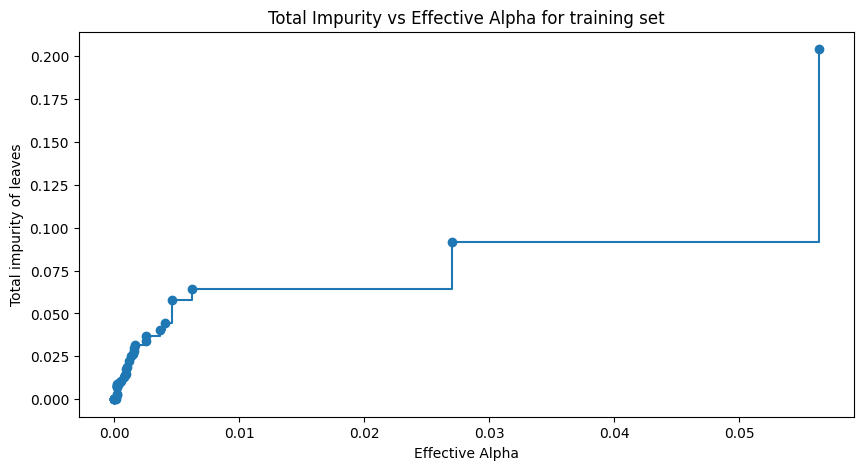

Number of nodes in the last tree is 1 with ccp_alpha 0.2958620862691873


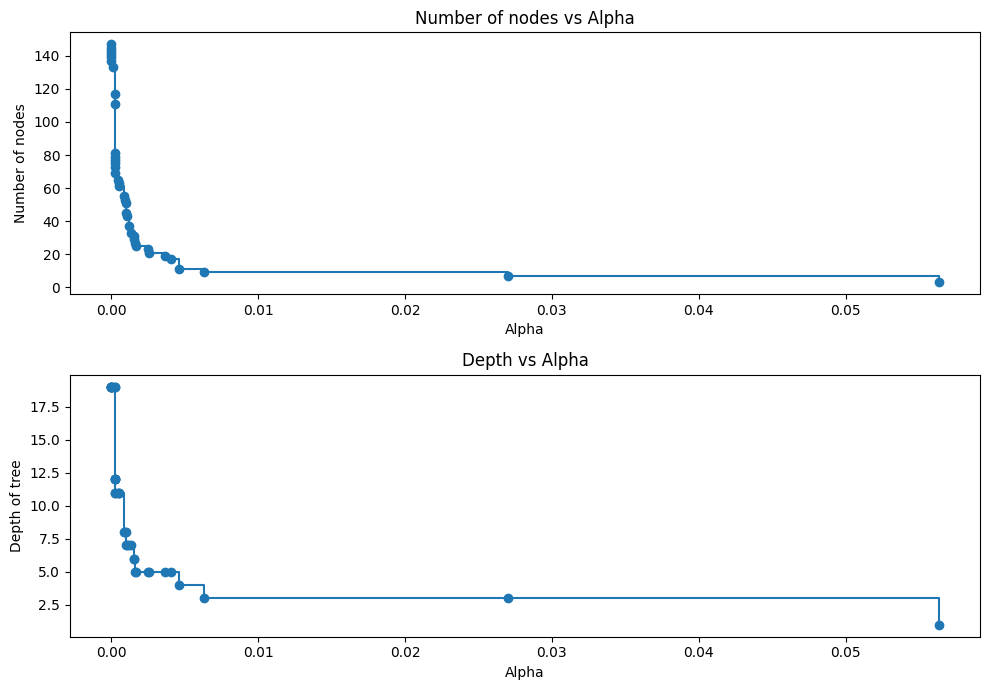

In [ ]:
alphas, dtrees = display_decision_tree_alpha_plots(X_train, y_train)

In [ ]:
# Function to generate recall scores for each path or calculated ccp_alpha
def generate_recall_scores(clfs, X, y):
  recall_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier
  # Iterate through each decision tree classifier in 'clfs'
  for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred = clf.predict(X)

    # Calculate the F1 score for the training set predictions compared to true labels
    rs = recall_score(y, pred)

    # Append the calculated F1 score to the train_f1_scores list
    recall_scores.append(rs)
  return recall_scores;

In [ ]:
# Recall scores for train
train_recall_scores = generate_recall_scores(dtrees, X_train, y_train)

In [ ]:
# Recall score for test
test_recall_scores = generate_recall_scores(dtrees, X_test, y_test)

In [ ]:
# Below function to display a comparison chart between recall scores on train and test data
def display_recall_comparison(alphas, train_recall_scores, test_recall_scores):
  # Create a figure
  fig, ax = plt.subplots(figsize=(15, 5))
  ax.set_xlabel("Alpha")  # Set the label for the x-axis
  ax.set_ylabel("Recall Score")  # Set the label for the y-axis
  ax.set_title("Recall Score vs Alpha for training and test sets")  # Set the title of the plot

  # Plot the training F1 scores against alpha, using circles as markers and steps-post style
  ax.plot(alphas, train_recall_scores, marker="o", label="training", drawstyle="steps-post")

  # Plot the testing F1 scores against alpha, using circles as markers and steps-post style
  ax.plot(alphas, test_recall_scores, marker="o", label="test", drawstyle="steps-post")

  ax.legend()
  plt.show()

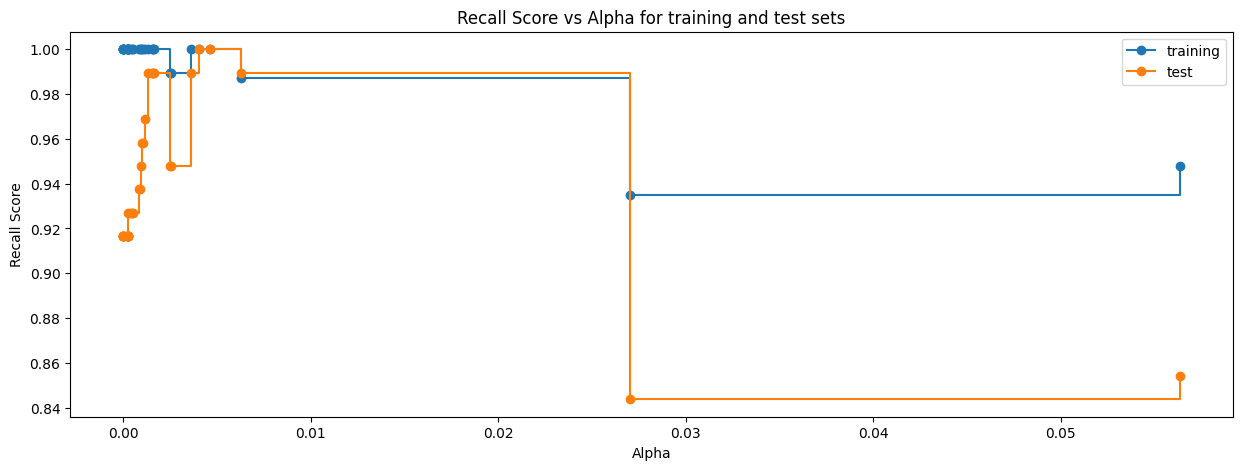

In [ ]:
display_recall_comparison(alphas, train_recall_scores, test_recall_scores)

In [ ]:
# This function finds the best tree among all the trees created using train data but best recall score on test data to find which model provides best result on test data.
def find_best_decision_tree_by_post_pruning(clfs, recall_scores):
  # creating the model where we get highest test recall Score
  index_best_model = np.argmax(recall_scores)

  # selcting the decision tree model corresponding to the highest test score
  best_decision_tree = clfs[index_best_model]
  print(best_decision_tree)
  return best_decision_tree

In [ ]:
dtree3 = find_best_decision_tree_by_post_pruning(dtrees, test_recall_scores)

DecisionTreeClassifier(ccp_alpha=0.004044397800382008, class_weight='balanced',
                       random_state=1)


In [ ]:
dtree3_train_performance = get_model_performance(dtree3, X_train, y_train)
dtree3_train_performance

,Accuracy,Recall,Precision,F1
0,0.939,1.0,0.611465,0.758893


In [ ]:
dtree3_test_performance = get_model_performance(dtree3, X_test, y_test)
dtree3_test_performance

,Accuracy,Recall,Precision,F1
0,0.937,1.0,0.603774,0.752941


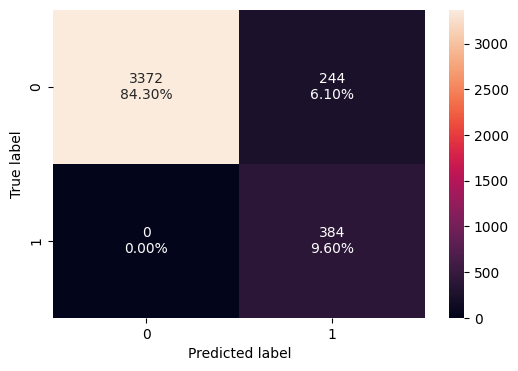

In [ ]:
plot_confusion_matrix(dtree3, X_train, y_train)

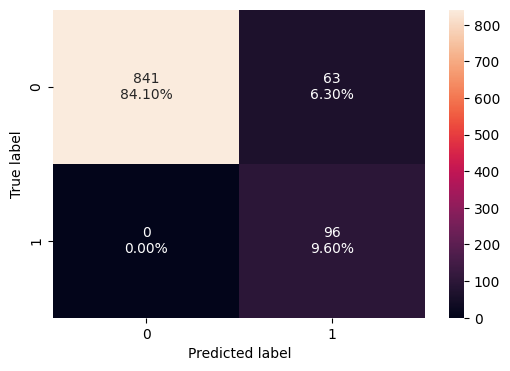

In [ ]:
plot_confusion_matrix(dtree3, X_test, y_test)

**Observations**
* We can see that dtree3 also provides the 0 False Positives but has much higher accuracy, precision, and F1 scores.

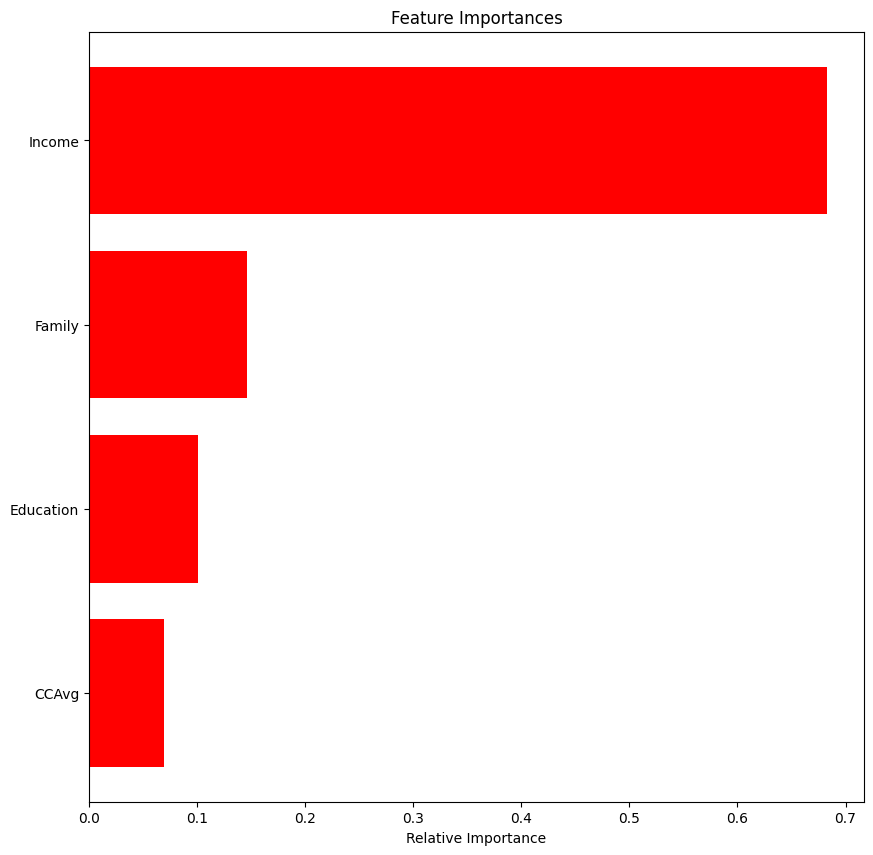

In [ ]:
display_importance_of_features(dtree3, X.columns)

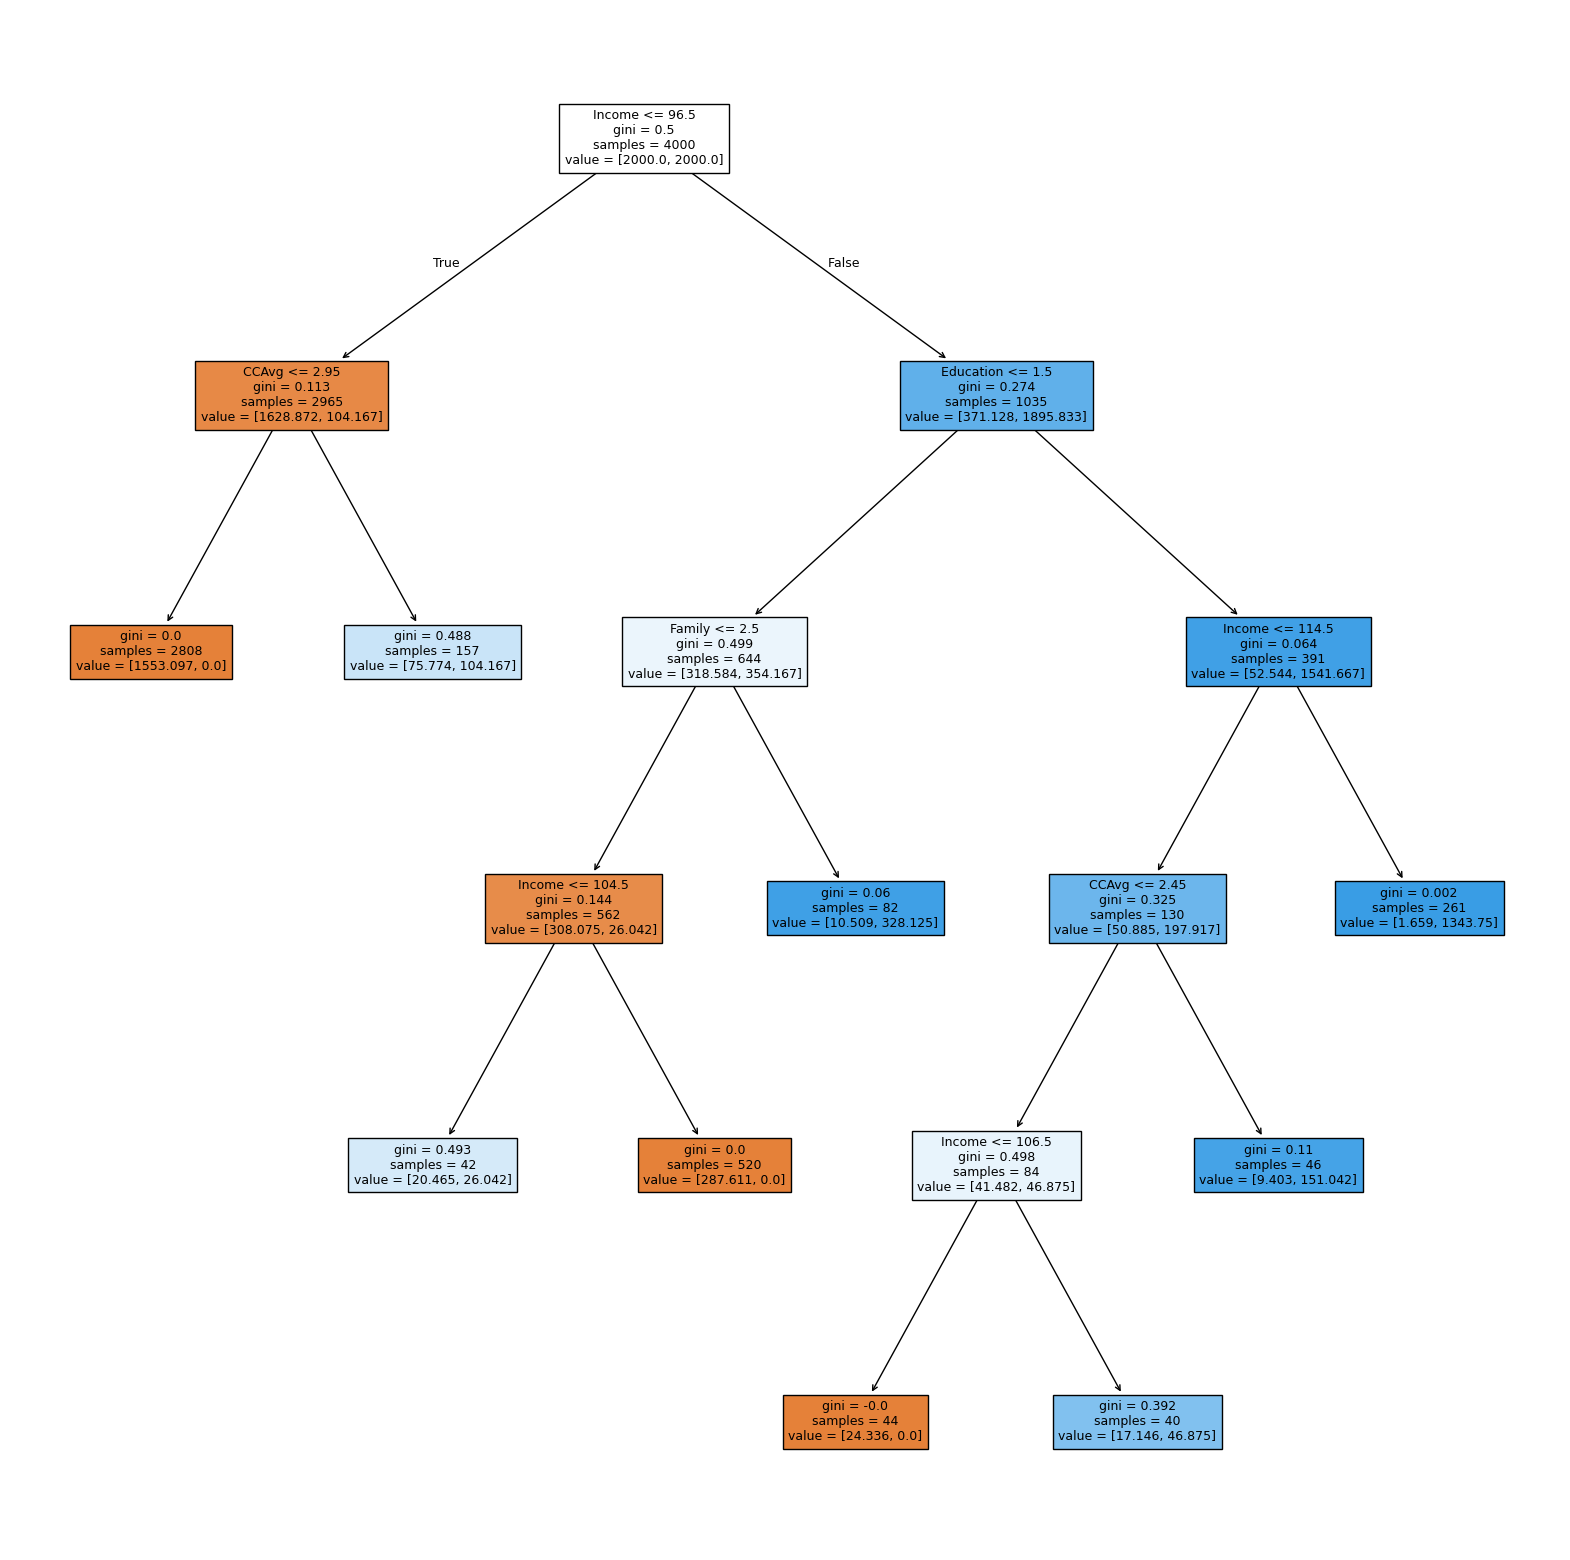

In [ ]:
display_decision_tree(dtree3, X.columns)

**Observations**
**Observations**
* The best-found post-pruned decision tree based on recall score

```
DecisionTreeClassifier(ccp_alpha=0.004044397800382008, class_weight='balanced',
                       random_state=1)
```
* Like pre-pruned, the post-pruned model achieves perfect recall (1.0 on both train and test), making it excellent at capturing all potential customers without missing anyone.
* **Precision:** However, it has a much higher precision (0.603774 on test) compared to pre-pruned tree. This indicates that while it's still predicting some false positives, it's more balanced and reducing them significantly compared to the pre-pruned model.
* **F1 score:** The F1 score (0.752941) shows a much better balance between precision and recall compared to pre-pruned, and it’s only slightly lower than in default tree.
* **Conclusion:** This model has the best combination of high recall and better precision. It achieves both goals without suffering from overfitting (train-test differences are minimal).
* This model has used only 5 attributes as the most important feature and has 5 levels, as shown above.
* This tree may not be the simplest but provides the best scores on test data.


## Model Performance Comparison and Final Model Selection

In [ ]:
# Function to provide score comparison of train and test data of a given decision tree model.
def print_decision_tree_comparison_metrics(dtree_train_perf, dtree_test_perf, name):
  models_train_comp_df = pd.concat(
      [
          dtree_train_perf.T,
          dtree_test_perf.T,
          dtree_train_perf.T - dtree_test_perf.T
      ],
      axis=1,
  )
  models_train_comp_df.columns = [
      "(Train)",
      "(Test)",
      "(Diff)"
  ]
  print("Performance comparison of:", name)
  print(models_train_comp_df)

In [ ]:
print("-"*50)
print_decision_tree_comparison_metrics(dtree1_train_performance, dtree1_test_performance, "Default")
print("-"*50)
print_decision_tree_comparison_metrics(dtree2_train_performance, dtree2_test_performance, "Pre-Pruning")
print("-"*50)
print_decision_tree_comparison_metrics(dtree3_train_performance, dtree3_test_performance, "Post-Pruning")
print("-"*50)

--------------------------------------------------
Performance comparison of: Default
           (Train)    (Test)    (Diff)
Accuracy       1.0  0.972000  0.028000
Recall         1.0  0.916667  0.083333
Precision      1.0  0.814815  0.185185
F1             1.0  0.862745  0.137255
--------------------------------------------------
Performance comparison of: Pre-Pruning
            (Train)    (Test)    (Diff)
Accuracy   0.798000  0.811000 -0.013000
Recall     1.000000  1.000000  0.000000
Precision  0.322148  0.336842 -0.014694
F1         0.487310  0.503937 -0.016627
--------------------------------------------------
Performance comparison of: Post-Pruning
            (Train)    (Test)    (Diff)
Accuracy   0.939000  0.937000  0.002000
Recall     1.000000  1.000000  0.000000
Precision  0.611465  0.603774  0.007691
F1         0.758893  0.752941  0.005952
--------------------------------------------------


### ***Overall Evaluation:***

* Default Model (dtree1): Has decent recall but suffers from overfitting and a drop in precision on the test set, which makes it less desirable.
* Pre-Pruning Model (dtree2): Achieves perfect recall but has a very low precision, which could make it less practical due to a high number of false positives.
* Post-Pruning Model (dtree3): Offers the best balance between perfect recall (1.0) and higher precision (0.603774), making it the most practical model for our scenario. The minimal difference between training and testing metrics further indicates that it generalizes well.

### ***Final Conclution:***

#### **Post-pruned model (dtree3) is the best choice overall. It maintains perfect recall, reduces false positives significantly compared to pre-pruned model, and has a good balance between recall and precision, making it the most reliable model for our use case.**

## Actionable Insights and Business Recommendations


### Business Recommendations:
* The business should focus on the high recall segment for loan offers. They can use some of the below strategies as proven techniques in financial industries.
 * Pre-approved loans.
 * Personalized loans.
 * Follow up campaigns on leads.
* The business must also focus on risk analysis and mitigation
 * The business should pair the model's output with a credit risk scoring model for risk assessment.
 * The business can offer a customized product (varying loan amounts and/or interest rates) based on credit risk scoring to mitigate risk.
* Improve customer experience by offering online loan applications or instant approval based on this model prediction.
* Experiment with best-performing loan offers and different sales channels.
* Analyze False Positives or Non-Conversions to monitor and improve the model.  


___